# ClusterAI 2020
# Ciencia de Datos - Ingenieria Industrial UTN BA
## Curso I5521

Autor: Juan Ignacio Demaestri

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark")

In [2]:
molinetes = pd.read_csv("molinetes_2017.csv", delimiter=';')

In [3]:
molinetes.head()


,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,1,0,0,1,1
1,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN02,CASEROS,1,0,0,1,1
2,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,2,0,0,2,1
3,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN01,CASEROS,1,0,0,1,1
4,201701,01/01/2017,08:30:00,08:45:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN01,CASEROS,2,0,0,2,1


In [4]:
col_nulls = molinetes.isnull().any()
col_nulls

#there is no null in df "molinetes"

PERIODO            False
FECHA              False
DESDE              False
HASTA              False
LINEA              False
MOLINETE           False
ESTACION           False
PAX_PAGOS          False
PAX_PASES_PAGOS    False
PAX_FRANQ          False
TOTAL              False
ID                 False
dtype: bool

## Análisis del Sistema de Subtes en Buenos Aires - Año 2017

### Cantidad de pasajes vendidos según Líneas

In [106]:
subte_2017 = pd.pivot_table(molinetes,values = 'PAX_PAGOS',columns = 'LINEA', index = molinetes.PERIODO.values, aggfunc = np.sum)

subte_2017


#ESTE GRÁFICO ESTÁ CONTANDO LA CANTIDAD DE  VIAJES VENDIDOS

LINEA,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H
201701,3834460,5621730,1236947,4586105,1220045,1409144
201702,3550342,5270099,1283963,4600956,1238068,1360188
201703,5214680,7439559,4071232,7150876,1856075,2004722
201704,4556945,6582713,3800242,6330574,1652409,1842976
201705,5283165,7486233,4461584,7334700,1921565,2097299
201706,5227842,7463395,4446730,7005382,1869777,2139033
201707,5079900,7613949,4516963,6751452,1723034,2158405
201708,5565130,7924001,4765357,7408899,2024671,2377587
201709,5391974,7778466,4679125,7265192,1996844,2429800
201710,5479104,7960526,4760706,7335110,2025442,2531691


In [107]:
subte_2017_total = subte_2017.sum()
subte_2017_total

LINEA
LINEA_A    59422134
LINEA_B    85404446
LINEA_C    46967026
LINEA_D    78923183
LINEA_E    21100550
LINEA_H    25171958
dtype: int64

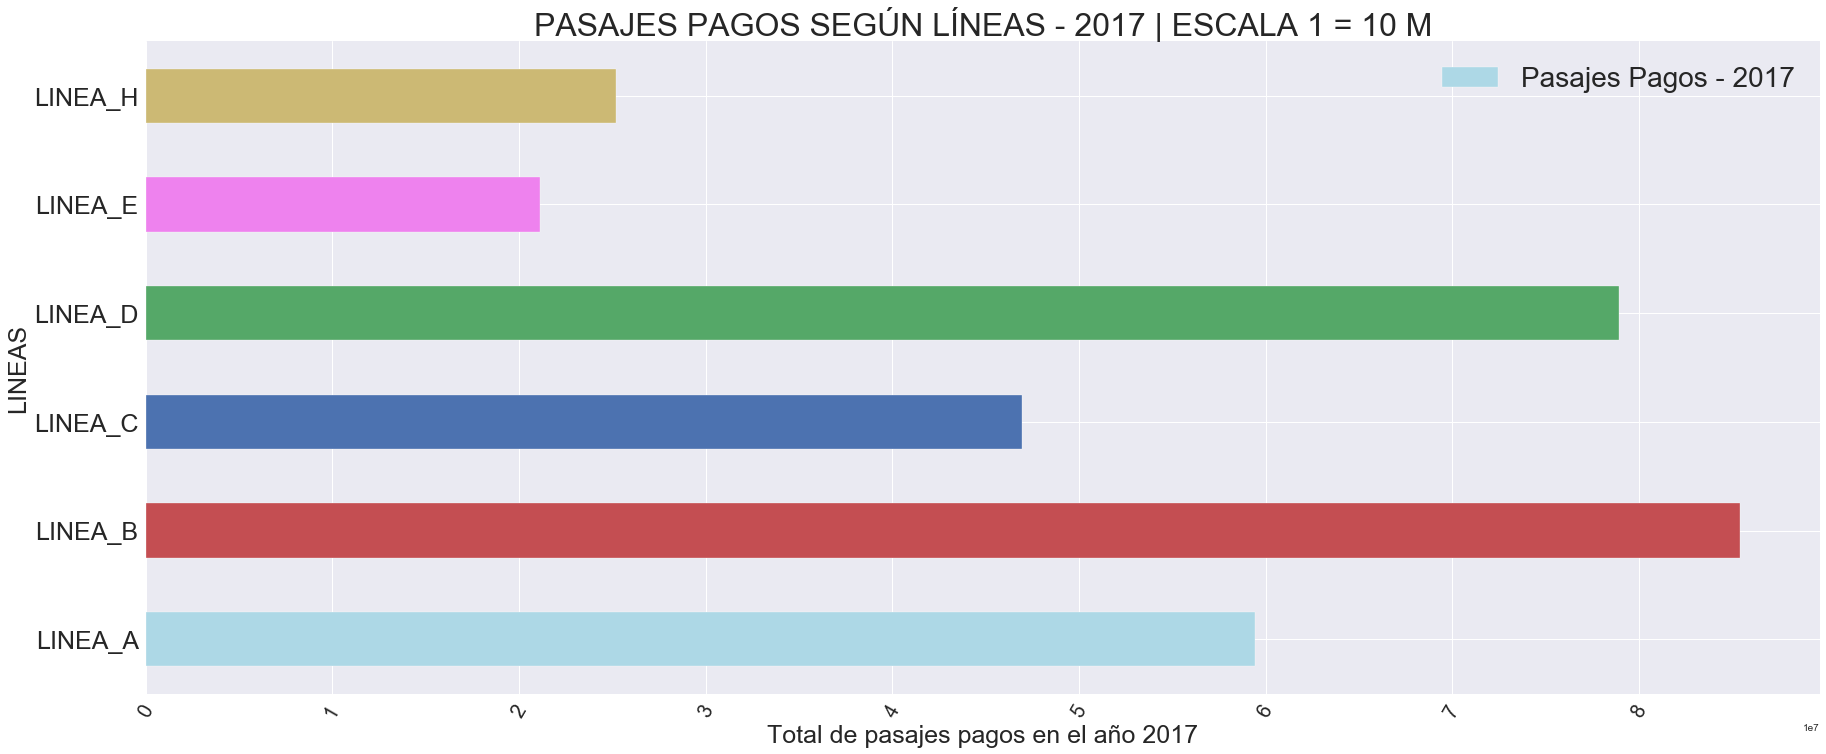

In [114]:
plt.style.use('seaborn')
subte_2017_total.plot.barh(figsize=(30,12), color=["lightblue","r","b","g","violet","y"])
plt.ylabel('LINEAS', fontsize=25)
plt.xlabel('Total de pasajes pagos en el año 2017', fontsize=25)
plt.title(str.upper('Pasajes pagos según Líneas - 2017 | Escala 1 = 10 M'),fontsize=32)
plt.legend(loc="upper right", labels=["Pasajes Pagos - 2017"], fontsize=28)
plt.xticks(fontsize=20, rotation=60)

plt.yticks(fontsize=25)


ax = plt.gca()
plt.show()

In [116]:
subte_2017_total.sum()

316989297

## Análisis - Línea D
#### Subte Buenos Aires - Año 2017

In [101]:
linea_d_2017 = pd.pivot_table(molinetes_d,values = 'TOTAL',columns = 'ESTACION', index = molinetes_d.PERIODO.values, aggfunc = np.sum)

### Cantidad de Pasajes vendidos según meses y estaciones - Año 2017

In [102]:
linea_d_2017.head(12)

ESTACION,9 DE JULIO,AGUERO,BULNES,CALLAO,CATEDRAL,CONGRESO DE TUCUMAN,FACULTAD DE MEDICINA,JOSE HERNANDEZ,JURAMENTO,MINISTRO CARRANZA,OLLEROS,PALERMO,PLAZA ITALIA,PUEYRREDON.D,SCALABRINI ORTIZ,TRIBUNALES
201701,223849,197300,321449,258228,700979,599642,204488,218134,330898,215107,233481,364999,215600,191395,229316,233036
201702,215156,195863,315455,283074,647163,586792,257457,220447,321401,208705,233359,345664,207290,183525,227709,290901
201703,280839,311752,475034,470943,945638,893625,530342,336893,476363,313945,360497,521464,334671,298575,358053,455602
201704,233505,284414,433025,408776,796270,807337,491715,300796,435842,283518,322664,471737,311966,262604,322230,374646
201705,277007,322110,487459,476129,943268,943707,553819,341478,486267,327767,369289,539418,407021,302580,362405,441107
201706,261301,312975,476320,450669,895885,892745,521442,335962,475124,320081,365021,525487,352490,288206,348313,416803
201707,263551,303793,484078,411260,846462,841803,423346,323584,486590,308980,355854,523560,392433,282762,346036,367520
201708,290264,331125,502837,476336,907808,968632,527212,355155,512337,333800,388126,565576,354603,313879,381632,432356
201709,268407,321904,481865,458362,900291,942187,551790,346548,499661,329760,382284,553326,360018,304223,375517,420341
201710,272543,326191,507372,467143,911441,946606,547439,352551,510894,341421,388800,570163,376627,310878,382968,428610


In [82]:
linea_d_totales = linea_d_2017.sum()
linea_d_tot_ord=linea_d_totales.sort_values(ascending=False)
linea_d_tot_ord

ESTACION
CATEDRAL                10145693
CONGRESO DE TUCUMAN     10128034
PALERMO                  5984797
JURAMENTO                5456675
FACULTAD DE MEDICINA     5443237
BULNES                   5413032
CALLAO                   4983615
TRIBUNALES               4653843
OLLEROS                  4095139
SCALABRINI ORTIZ         4035284
PLAZA ITALIA             3985912
JOSE HERNANDEZ           3778951
MINISTRO CARRANZA        3605878
AGUERO                   3497967
PUEYRREDON.D             3308842
9 DE JULIO               3083303
dtype: int64

### Cantidad de Pasajes vendidos anual según estaciones - Año 2017

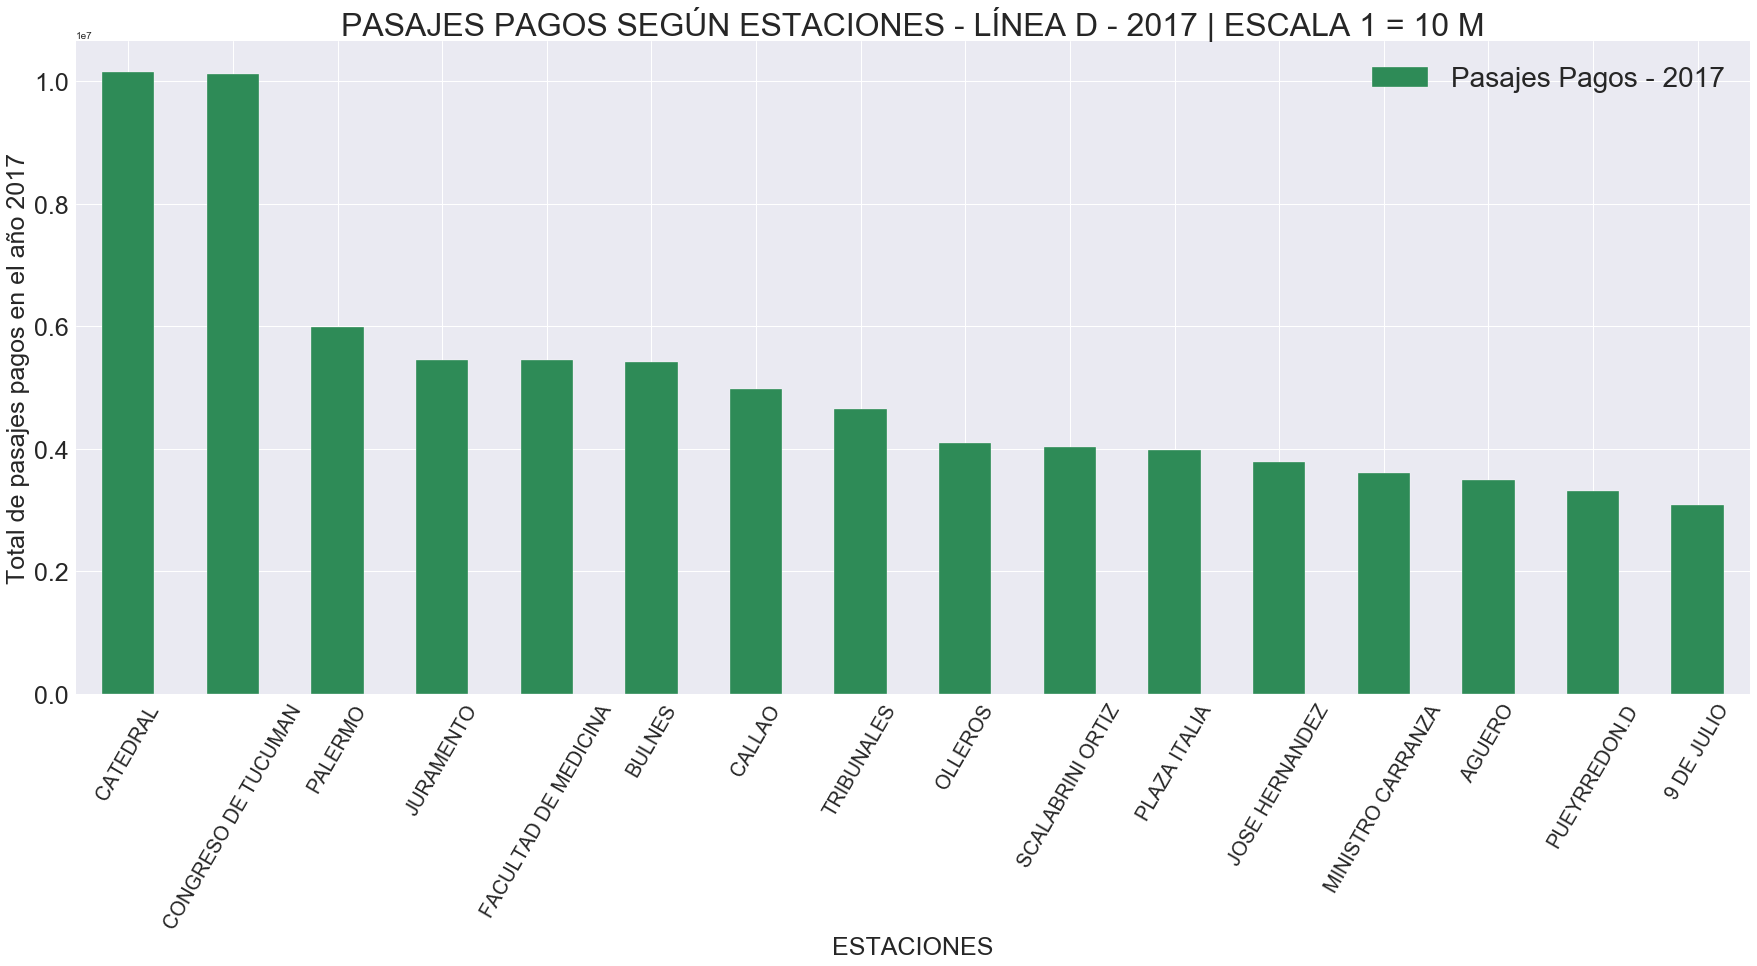

In [91]:
plt.style.use('seaborn')
linea_d_tot_ord.plot.bar(figsize=(30,12),color="seagreen")
plt.xlabel('ESTACIONES', fontsize=25)
plt.ylabel('Total de pasajes pagos en el año 2017', fontsize=25)
plt.title(str.upper('Pasajes pagos según estaciones - Línea D - 2017 | Escala 1 = 10 M'),fontsize=32)
plt.legend(loc="upper right", labels=["Pasajes Pagos - 2017"], fontsize=28)
plt.xticks(fontsize=20, rotation=60)

plt.yticks(fontsize=25)


ax = plt.gca()
plt.show()


### Variación de Venta de Pasajes según meses y estaciones Línea D - Año 2017

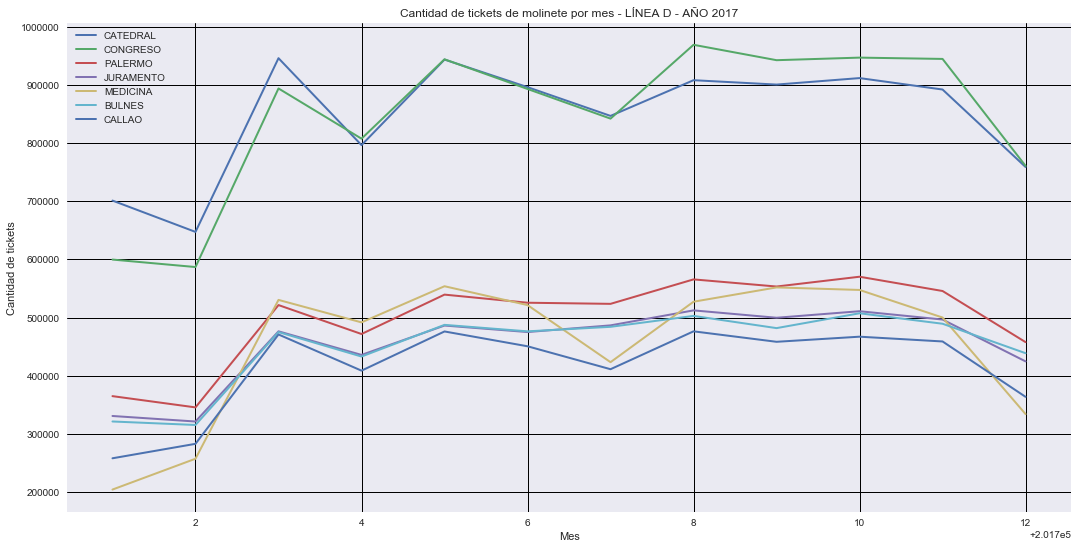

In [138]:
plt.figure(figsize=(18,9))
plt.plot(linea_d_2017.index, linea_d_2017['CATEDRAL'], label='CATEDRAL',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['CONGRESO DE TUCUMAN'], label='CONGRESO',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['PALERMO'], label='PALERMO',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['JURAMENTO'], label='JURAMENTO',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['FACULTAD DE MEDICINA'], label='MEDICINA',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['BULNES'], label='BULNES',linestyle='-', linewidth=2);
plt.plot(linea_d_2017.index, linea_d_2017['CALLAO'], label='CALLAO',linestyle='-', linewidth=2);
plt.legend(loc='best')
plt.title('Cantidad de tickets de molinete por mes - LÍNEA D - AÑO 2017')
plt.ylabel('Cantidad de tickets')
plt.xlabel('Mes')
plt.grid(True, color='black', linestyle='-', linewidth=1)
plt.show()

## Análisis - Estaciones Particulares - Línea D
#### Subte Buenos Aires - Año 2017

In [20]:
Pueyrredón_D = molinetes_d.loc[molinetes_d['ESTACION'] == 'PUEYRREDON.D']
Pueyrredón_D["PAX_PAGOS"].sum()

3199099

In [143]:
molinetes_d_catedral = molinetes_d.loc[molinetes_d['ESTACION'] == 'CATEDRAL']
molinetes_d_bulnes = molinetes_d.loc[molinetes_d['ESTACION'] == 'BULNES']
molinetes_d_aguero = molinetes_d.loc[molinetes_d['ESTACION'] == 'AGUERO']
molinetes_d_congreso = molinetes_d.loc[molinetes_d['ESTACION'] == 'CONGRESO DE TUCUMAN']



In [133]:
molinetes_d_catedral_horarios = molinetes_d_catedral[["DESDE", "PAX_PAGOS"]].groupby("DESDE").sum()
molinetes_d_catedral_horarios.head()

,PAX_PAGOS
DESDE,
05:00:00,2023
05:15:00,2125
05:30:00,3106
05:45:00,4835
06:00:00,8715


In [134]:
molinetes_d_catedral_horarios.sum()

PAX_PAGOS    9895296
dtype: int64

### Estaciones Pueyrredón - Línea D
#### Subte Buenos Aires - Año 2017

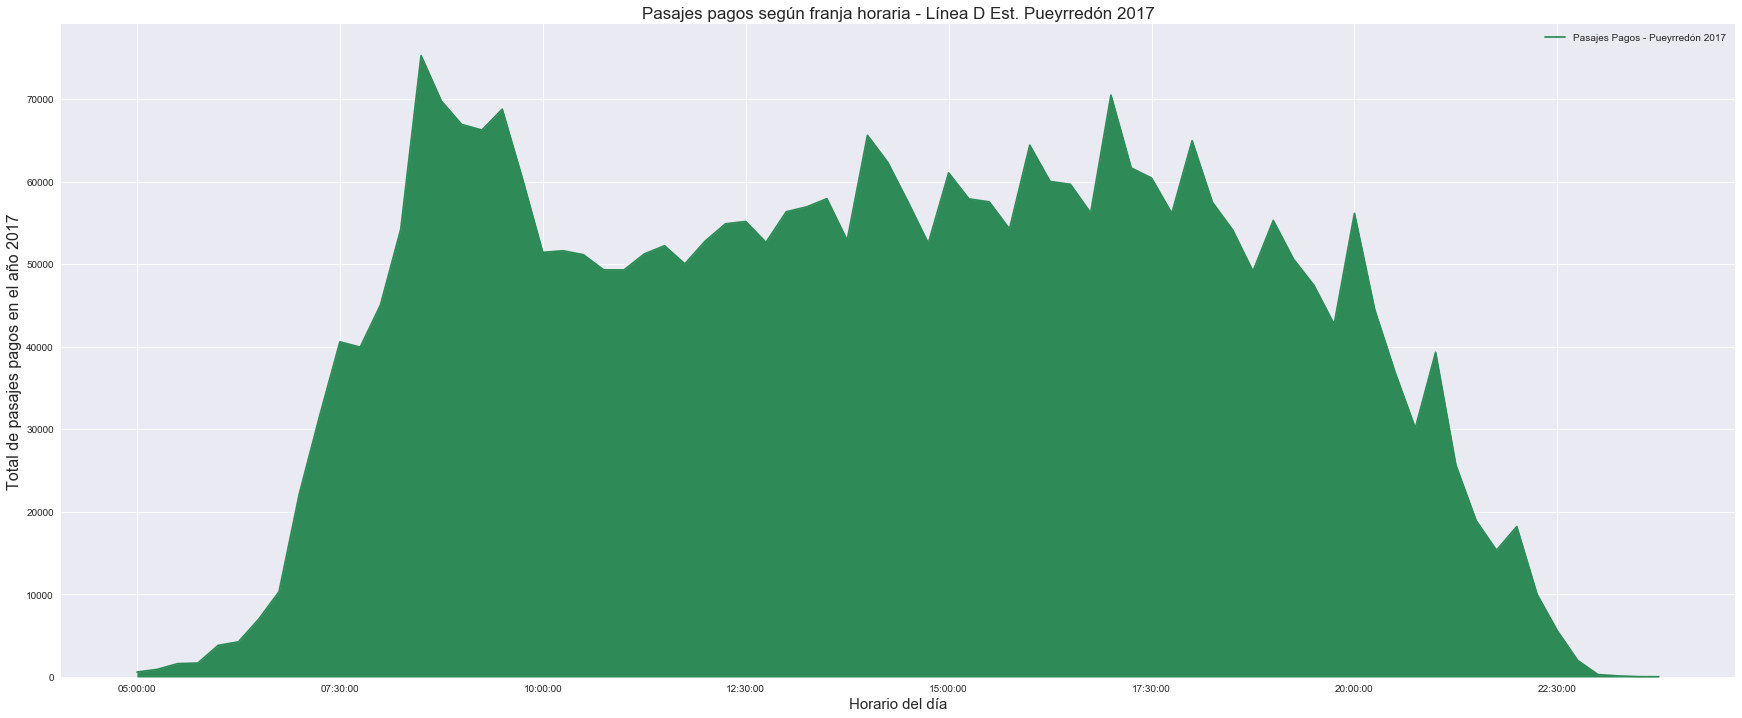

In [28]:
#Condiciones de análisis

#Cantidad TOTAL de Pasajes vendidos durante 2017, segregado por franja horaria.
#ESTACIÓN PUEYRREDÓN - LÍNEA D - AÑO 2017

plt.style.use('seaborn')
molinetes_d_puey_horarios.plot.area(figsize=(30,12),color="seagreen")
plt.xlabel('Horario del día', fontsize=15)
plt.ylabel('Total de pasajes pagos en el año 2017', fontsize=16)
plt.title('Pasajes pagos según franja horaria - Línea D Est. Pueyrredón 2017',fontsize=17)
plt.legend(loc="upper right", labels=["Pasajes Pagos - Pueyrredón 2017"])

ax = plt.gca()
plt.show()


Condiciones de análisis

-Cantidad TOTAL de Pasajes vendidos durante 2017, segregado por franja horaria.<br>
-ESTACIÓN PUEYRREDÓN - LÍNEA D - AÑO 2017-<br>
<br>

Analizando:<br>
<br>
Durante 2017, la hora de mayor concurrencia en la ESTACIÓN PUEYRREDÓN, de la LÍNEA D, fue entre las 08:00 y las 09:30, alcanzando picos de 70.000 pasajes vendidos durante todo el año.

### Estaciones Catedral - Línea D
#### Subte Buenos Aires - Año 2017

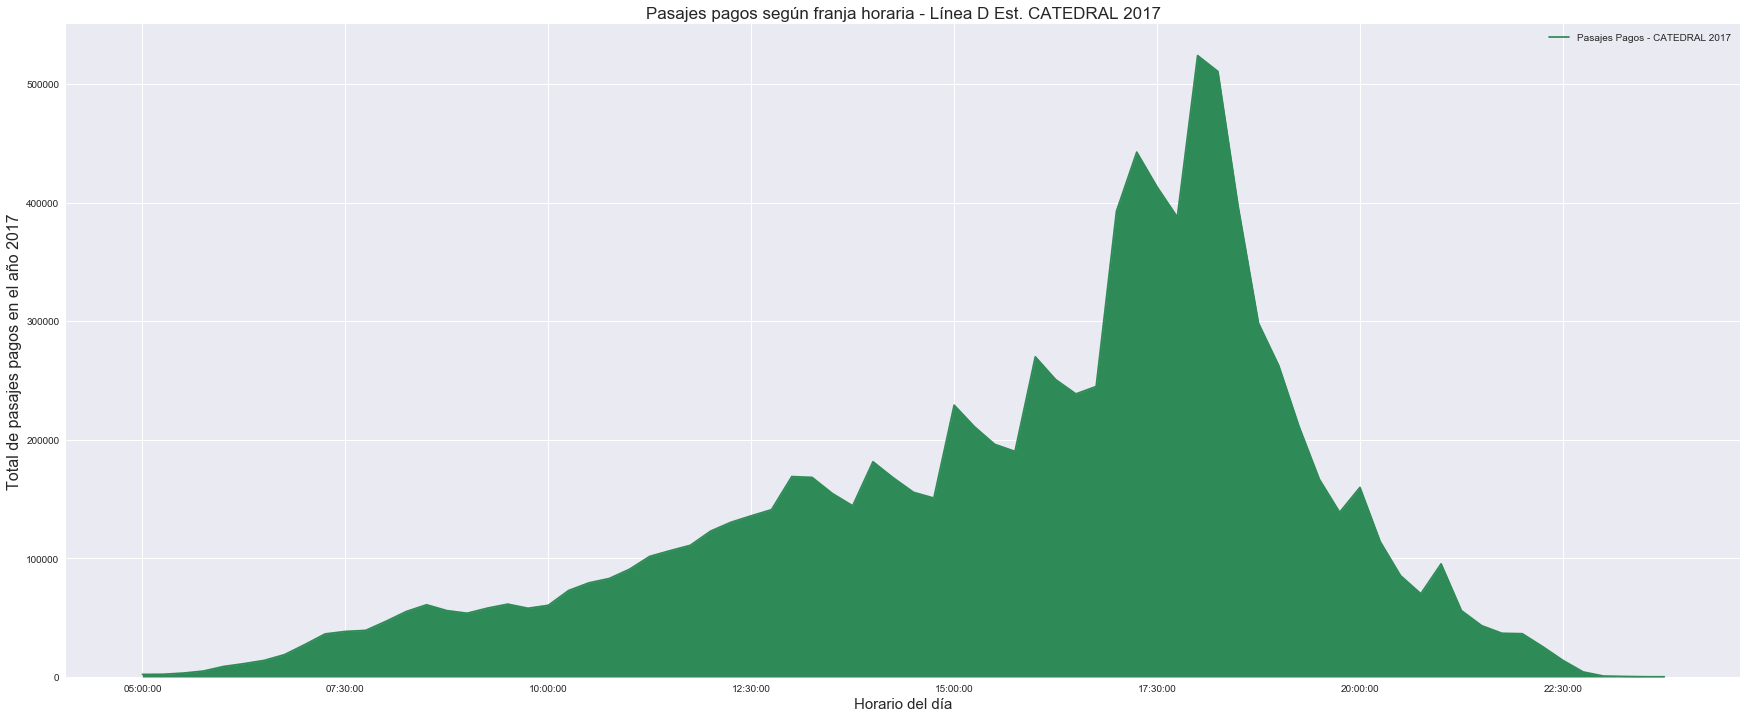

In [135]:
#Condiciones de análisis

#Cantidad TOTAL de Pasajes vendidos durante 2017, segregado por franja horaria.
#ESTACIÓN CATEDRAL - LÍNEA D - AÑO 2017

plt.style.use('seaborn')
molinetes_d_catedral_horarios.plot.area(figsize=(30,12),color="seagreen")
plt.xlabel('Horario del día', fontsize=15)
plt.ylabel('Total de pasajes pagos en el año 2017', fontsize=16)
plt.title('Pasajes pagos según franja horaria - Línea D Est. CATEDRAL 2017',fontsize=17)
plt.legend(loc="upper right", labels=["Pasajes Pagos - CATEDRAL 2017"])

ax = plt.gca()
plt.show()

### Estaciones Congreso de Tucumán - Línea D
#### Subte Buenos Aires - Año 2017

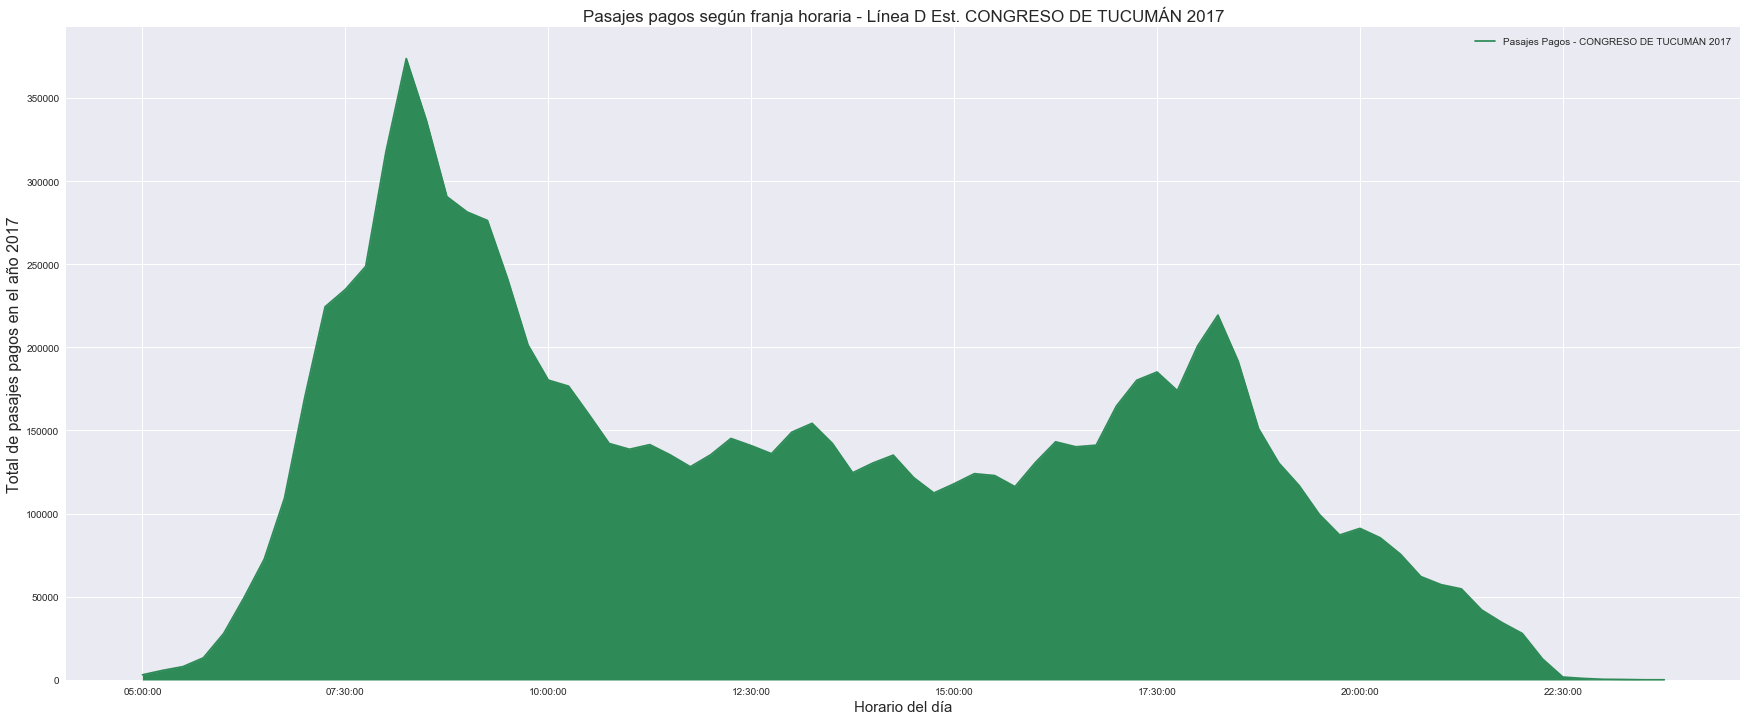

In [145]:
#Condiciones de análisis

#Cantidad TOTAL de Pasajes vendidos durante 2017, segregado por franja horaria.
#ESTACIÓN CONGRESO DE TUCUMÁN - LÍNEA D - AÑO 2017
molinetes_d_congreso_horarios = molinetes_d_congreso[["DESDE", "PAX_PAGOS"]].groupby("DESDE").sum()
plt.style.use('seaborn')
molinetes_d_congreso_horarios.plot.area(figsize=(30,12),color="seagreen")
plt.xlabel('Horario del día', fontsize=15)
plt.ylabel('Total de pasajes pagos en el año 2017', fontsize=16)
plt.title('Pasajes pagos según franja horaria - Línea D Est. CONGRESO DE TUCUMÁN 2017',fontsize=17)
plt.legend(loc="upper right", labels=["Pasajes Pagos - CONGRESO DE TUCUMÁN 2017"])

ax = plt.gca()
plt.show()


## Análisis - Línea B
#### Subte Buenos Aires - Año 2017

In [5]:
molinetes_a = molinetes.loc[molinetes['LINEA'] == 'LINEA_A']
molinetes_b = molinetes.loc[molinetes['LINEA'] == 'LINEA_B']
molinetes_c = molinetes.loc[molinetes['LINEA'] == 'LINEA_C']
molinetes_d = molinetes.loc[molinetes['LINEA'] == 'LINEA_D']
molinetes_e = molinetes.loc[molinetes['LINEA'] == 'LINEA_E']
molinetes_h = molinetes.loc[molinetes['LINEA'] == 'LINEA_H']

### Variación de Venta de Pasajes según meses y estaciones Línea B - Año 2017

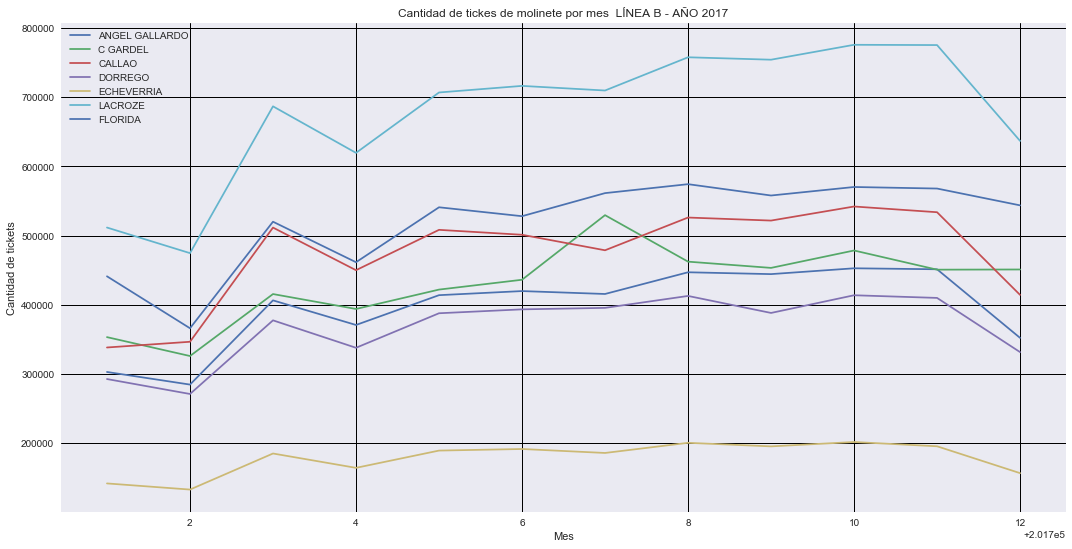

In [142]:
linea_b_2017 = pd.pivot_table(molinetes_b,values = 'TOTAL',columns = 'ESTACION', index = molinetes_b.PERIODO.values, aggfunc = np.sum)
plt.figure(figsize=(18,9))
plt.plot(linea_b_2017.index, linea_b_2017['ANGEL GALLARDO'], label='ANGEL GALLARDO');
plt.plot(linea_b_2017.index, linea_b_2017['CARLOS GARDEL'], label='C GARDEL');
plt.plot(linea_b_2017.index, linea_b_2017['CALLAO.B'], label='CALLAO');
plt.plot(linea_b_2017.index, linea_b_2017['DORREGO'], label='DORREGO');
plt.plot(linea_b_2017.index, linea_b_2017['ECHEVERRIA'], label='ECHEVERRIA');
plt.plot(linea_b_2017.index, linea_b_2017['FEDERICO LACROZE'], label='LACROZE');
plt.plot(linea_b_2017.index, linea_b_2017['FLORIDA'], label='FLORIDA');
plt.legend(loc='best')
plt.title('Cantidad de tickes de molinete por mes  LÍNEA B - AÑO 2017')
plt.grid(True, color='black', linestyle='-', linewidth=1)

plt.ylabel('Cantidad de tickets')
plt.xlabel('Mes')
plt.show()